# 03 Q-agent hyperparameters analysis

#### 👉RL agents are extremelly sensitive to hyper-parameters.

#### 👉In the previous notebook you trusted me when I set them, but in reality you will need to tune them yourself.

#### 👉Let's play with them in a systematic way to gain a better intuition of how they impact learning.

In [4]:
%load_ext autoreload
%autoreload 2
%pylab inline
%config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


/Users/paulabartabajo/src/online-courses/hands-on-rl/01_taxi/.venv/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['gamma']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Environment 🌎

In [5]:
import gym
env = gym.make("Taxi-v3").env

## Q-agent 🤖🧠

In [6]:
# No need to copy paste the same QAgent definition in every notebook, don't you think?
from src.q_agent import QAgent

# hyper-parameters
# RL problems are full of these hyper-parameters.
# For the moment, trust me when I set these values.
# We will later play with these and see how they impact learning.
alphas = [0.01, 0.1, 1]
gammas = [0.1, 0.6, 0.9]

## Training loop 🎡

In [38]:
import pandas as pd

from src.train_loop import train

# exploration vs exploitation prob
# let's start with a constant probability of 10%.
epsilon = 0.1
n_episodes = 1000

results = pd.DataFrame()
for alpha in alphas:
    for gamma in gammas:
        
        print(f'alpha: {alpha}, gamma: {gamma}')
        agent = QAgent(env, alpha, gamma)
        
        timesteps, penalties = train(agent, env, n_episodes, epsilon)
        
        # collect timesteps and penalties for this pair of hyper-parameters (alpha, gamma)
        results_ = pd.DataFrame()
        results_['timesteps'] = timesteps
        results_['penalties'] = penalties
        results_['alpha'] = alpha
        results_['gamma'] = gamma
        results = pd.concat([results, results_])

# index -> episode
results = results.reset_index().rename(columns={'index': 'episode'})

# add column with the 2 hyper-parameters
results['hyperparameters'] = [f'alpha={a}, gamma={g}' for (a, g) in zip(results['alpha'], results['gamma'])]

alpha: 0.01, gamma: 0.1


100%|█████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 37.25it/s]


alpha: 0.01, gamma: 0.6


100%|█████████████████████████████████████████████████████████████████| 1000/1000 [00:19<00:00, 51.16it/s]


alpha: 0.01, gamma: 0.9


100%|█████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 74.97it/s]


alpha: 0.1, gamma: 0.1


100%|█████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 90.96it/s]


alpha: 0.1, gamma: 0.6


100%|████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 260.21it/s]


alpha: 0.1, gamma: 0.9


100%|████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 324.77it/s]


alpha: 1, gamma: 0.1


100%|████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 936.89it/s]


alpha: 1, gamma: 0.6


100%|████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 991.14it/s]


alpha: 1, gamma: 0.9


100%|████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 909.10it/s]


/Users/paulabartabajo/src/online-courses/hands-on-rl/01_taxi/.venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='episode', ylabel='timesteps'>

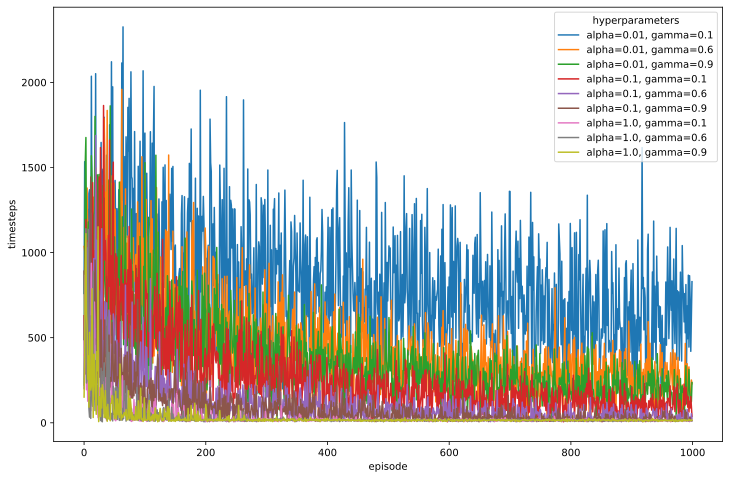

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.lineplot('episode', 'timesteps', hue='hyperparameters', data=results)

## That looks cool! 😎 But a bit too noisy... 😵‍💫
## What about averaging over several runs?

In [44]:
from src.train_loop import train_many_runs

# exploration vs exploitation prob
# let's start with a constant probability of 10%.
epsilon = 0.1
n_episodes = 1000
n_runs = 5

results = pd.DataFrame()
for alpha in alphas:
    for gamma in gammas:
        
        print(f'alpha: {alpha}, gamma: {gamma}')
        agent = QAgent(env, alpha, gamma)
        
        timesteps, penalties = train_many_runs(agent, env, n_episodes, epsilon, n_runs)
        
        # collect timesteps and penalties for this pair of hyper-parameters (alpha, gamma)
        results_ = pd.DataFrame()
        results_['timesteps'] = timesteps
        results_['penalties'] = penalties
        results_['alpha'] = alpha
        results_['gamma'] = gamma
        results = pd.concat([results, results_])

# index -> episode
results = results.reset_index().rename(columns={'index': 'episode'})

results['hyperparameters'] = [f'alpha={a}, gamma={g}' for (a, g) in zip(results['alpha'], results['gamma'])]

alpha: 0.01, gamma: 0.1


100%|█████████████████████████████████████████████████████████████████| 1000/1000 [00:37<00:00, 26.48it/s]


alpha: 0.01, gamma: 0.6


100%|█████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 60.09it/s]


alpha: 0.01, gamma: 0.9


100%|█████████████████████████████████████████████████████████████████| 1000/1000 [00:24<00:00, 40.88it/s]


alpha: 0.1, gamma: 0.1


100%|█████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 64.34it/s]


alpha: 0.1, gamma: 0.6


100%|████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 226.27it/s]


alpha: 0.1, gamma: 0.9


100%|████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 258.70it/s]


alpha: 1, gamma: 0.1


100%|████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 700.63it/s]


alpha: 1, gamma: 0.6


100%|████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 709.06it/s]


alpha: 1, gamma: 0.9


100%|████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 757.84it/s]


/Users/paulabartabajo/src/online-courses/hands-on-rl/01_taxi/.venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='episode', ylabel='timesteps'>

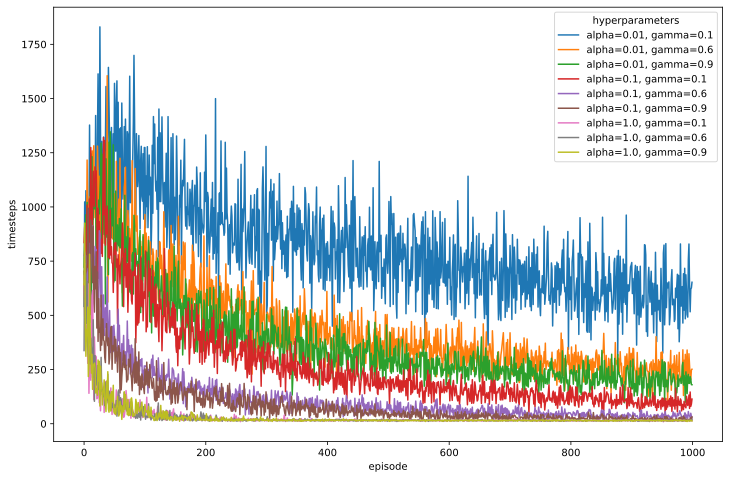

In [45]:
fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.lineplot('episode', 'timesteps', hue='hyperparameters', data=results)

## Nice one!

## What about `epsilon`? Is the current value of 10% the best?

In [62]:
# best hyper-parameters so far
alpha = 1.0
gamma = 0.9

epsilons = [0.01, 0.10, 0.9]
n_runs = 10
n_episodes = 200

results = pd.DataFrame()
for epsilon in epsilons:
        
    print(f'epsilon: {epsilon}')
    agent = QAgent(env, alpha, gamma)

    timesteps, penalties = train_many_runs(agent, env, n_episodes, epsilon, n_runs)

    # collect timesteps and penalties for this pair of hyper-parameters (alpha, gamma)
    results_ = pd.DataFrame()
    results_['timesteps'] = timesteps
    results_['penalties'] = penalties
    results_['epsilon'] = epsilon
    results = pd.concat([results, results_])

# index -> episode
results = results.reset_index().rename(columns={'index': 'episode'})

epsilon: 0.01


100%|██████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 351.23it/s]


epsilon: 0.1


100%|██████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 340.75it/s]


epsilon: 0.9


100%|███████████████████████████████████████████████████████████████████| 200/200 [00:02<00:00, 88.89it/s]


/Users/paulabartabajo/src/online-courses/hands-on-rl/01_taxi/.venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


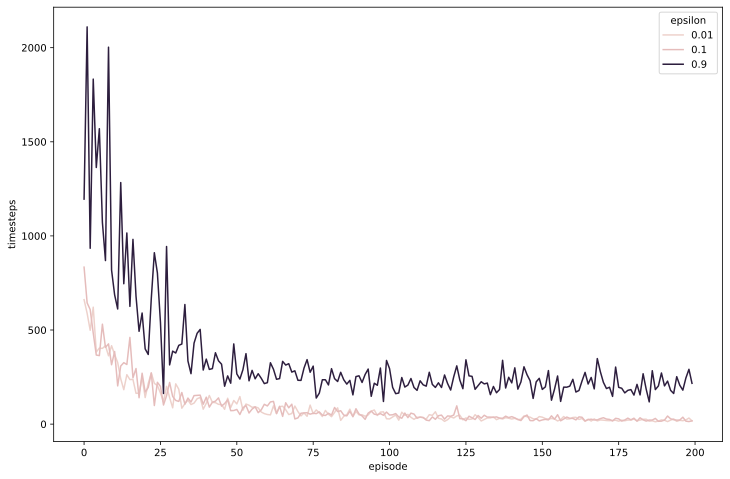

/Users/paulabartabajo/src/online-courses/hands-on-rl/01_taxi/.venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='episode', ylabel='penalties'>

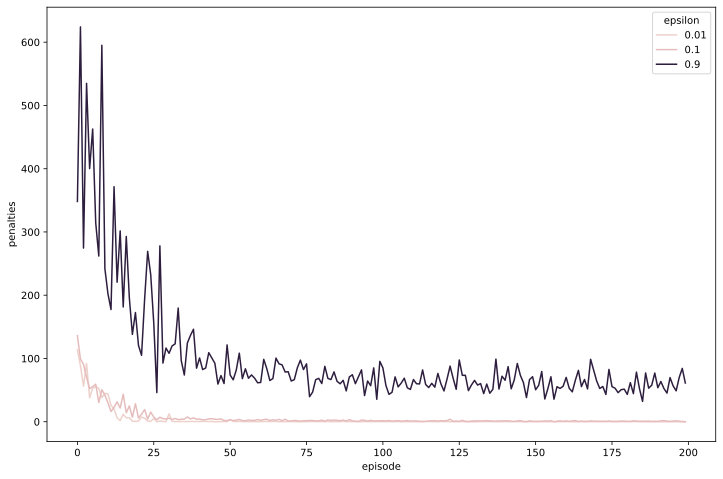

In [66]:
fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.lineplot('episode', 'timesteps', hue='epsilon', data=results)
plt.show()

fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.lineplot('episode', 'penalties', hue='epsilon', data=results)

## Exercises 🏋️🏋️🏋️

### 1. Can you parallelize the function `train_many_runs` using Python's `multiprocessing` module?

I do not like to wait and stare at each progress bar, while I think that each run in `train_many_runs` could execute
in parallel.

Create a new function called `train_many_runs_in_parallel` that outputs the same results as `train_many_runs` but that executes in a fraction of time.

### 2. Can you update the function `train` in a way that the input `epsilon` can also be a callable function?

An `epsilon` value that decays after each episode works better than a fixed `epsilon` for most RL problems.

This is hard exercise, but I want you to give it a try.

If you do not manage it, do not worry. We are going to implement this in the next lesson.